# Project 3: Soccer Analysis

# Prefactory Remarks

- [x] **Create a virtual environment to download the packages**

In [ ]:
# You don't have to do this, it's just safer.

# Install virtualenv (virtual environment):

# !pip install virtualenv

# Create a virtual environment named "myenv":

# !python -m venv myenv

# Activate the virtual environment:

# myenv\Scripts\activate (Windows)
# source myenv/bin/activate (macOS/Linux)

# Upgrade pip and install essential data science libraries inside the virtual environment:

# !myenv/bin/python -m pip install --upgrade pip  
# !myenv/bin/python -m pip install numpy pandas matplotlib seaborn scikit-learn scipy statsmodels jupyterlab plotly openpyxl xlrd tensorflow keras torch torchvision pyspark ipykernel

# Add the virtual environment as a Jupyter kernel:

# !myenv/bin/python -m ipykernel install --user --name=myenv --display-name "Python (myenv)"

# Deactivate the virtual environment (Run this in the terminal):

# deactivate

- [x] **Libraries we may need to install**

In [ ]:
# Run these directly in a cell

#!pip install tensorflow
#!pip install missingno
#!pip install seaborn
#!pip install numpy
#!pip install pandas
#!pip install matplotlib

- [x] **Tips for rearranging your Notebook**

- Hold ctrl+shift and click on the various cells you want to move, then press the arrow keys to move them up or down.

# Data Analysis (Using the Pandas Library)

## 1. Visualize the data

- [x] **Checking the data**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_s = pd.read_csv("stats.csv")   # stats table
df_r = pd.read_csv("results.csv")  # results table

df_s

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Huddersfield Town,9.0,19.0,28.0,62.0,3.0,362.0,109.0,8.0,5.0,...,765.0,165.0,22619.0,21.0,6.0,416.0,2.0,31.0,24.0,2017-2018
236,Swansea City,8.0,21.0,28.0,51.0,1.0,338.0,103.0,8.0,3.0,...,694.0,150.0,22775.0,26.0,1.0,439.0,3.0,44.0,15.0,2017-2018
237,Southampton,7.0,16.0,37.0,63.0,2.0,450.0,145.0,15.0,7.0,...,800.0,227.0,24639.0,37.0,4.0,379.0,1.0,29.0,13.0,2017-2018
238,Stoke City,7.0,19.0,35.0,62.0,1.0,384.0,132.0,8.0,8.0,...,598.0,136.0,20368.0,33.0,3.0,402.0,0.0,27.0,14.0,2017-2018


- [x] **Check the data types**

In [9]:
df_r.dtypes
df_s.dtypes

team                     object
wins                    float64
losses                  float64
goals                   float64
total_yel_card          float64
total_red_card          float64
total_scoring_att       float64
ontarget_scoring_att    float64
hit_woodwork            float64
att_hd_goal             float64
att_pen_goal            float64
att_freekick_goal       float64
att_ibox_goal           float64
att_obox_goal           float64
goal_fastbreak          float64
total_offside           float64
clean_sheet             float64
goals_conceded          float64
saves                   float64
outfielder_block        float64
interception            float64
total_tackle            float64
last_man_tackle         float64
total_clearance         float64
head_clearance          float64
own_goals               float64
penalty_conceded        float64
pen_goals_conceded      float64
total_pass              float64
total_through_ball      float64
total_long_balls        float64
backward

## 2. Cleaning the data

- [x] **Check for spelling mistakes or missing data**

In [80]:
df_r["season"].value_counts()   # check all seasons and their value counts, no inconsistencies here
df_r["home_team"].value_counts()
df_r["away_team"].value_counts()

df_r.isnull().sum()   # Nothing unusual here
df_s.isnull().sum()   # There are quite a few that should be turned to 0

# For the dispossessed column, the NaN values may arise from the people not being able to record those instances instead of them being 0.
# Let's see if this 0 value exists in this column to confirm if it's a missing value or not

df_s.loc[df_s["dispossessed"] == 0]

# It doesn't exist. Goalkeepers and some defenders might not have dispossession stats because they rarely dribble.
# For the sake of argument, let's assume this was a mistake and convert it to zero


df_s.fillna({"dispossessed": 0}, inplace=True)    # Turn the values to 0

df_s

# Let's do the same for the "big chance missed" column

df_s.fillna({"big_chance_missed": 0}, inplace=True)

df_s["total_through_ball"].value_counts()   # We'll check later for other mistakes that may arise

total_through_ball
57.0     6
54.0     5
30.0     5
37.0     5
22.0     5
        ..
252.0    1
212.0    1
114.0    1
136.0    1
63.0     1
Name: count, Length: 122, dtype: int64

- [x] **Check the stats table for inconsistencies**

In [51]:
df_s.dtypes  # We can't extrapolate anything from the data just yet. We must analyze it and clean it later 

team                     object
wins                    float64
losses                  float64
goals                   float64
total_yel_card          float64
total_red_card          float64
total_scoring_att       float64
ontarget_scoring_att    float64
hit_woodwork            float64
att_hd_goal             float64
att_pen_goal            float64
att_freekick_goal       float64
att_ibox_goal           float64
att_obox_goal           float64
goal_fastbreak          float64
total_offside           float64
clean_sheet             float64
goals_conceded          float64
saves                   float64
outfielder_block        float64
interception            float64
total_tackle            float64
last_man_tackle         float64
total_clearance         float64
head_clearance          float64
own_goals               float64
penalty_conceded        float64
pen_goals_conceded      float64
total_pass              float64
total_through_ball      float64
total_long_balls        float64
backward

- [x] **Check for NaN values in all of the columns, then in a specific set of columns**

In [90]:
# In all columns

print("In all columns:")

df_s = pd.read_csv("stats.csv")

df_s

nan_counts = df_s.isna().sum()

print(nan_counts[nan_counts > 0])

# In a specific set of columns

print("In a specific set of columns:")

X = df_s[['total_yel_card', 'total_red_card', 'total_scoring_att', 'ontarget_scoring_att', 
        'att_freekick_goal', 'clean_sheet', 'saves', 'total_pass', 'total_cross', 'wins', 'losses']]


nan_counts = X.isna().sum()

print(nan_counts[nan_counts > 0])

In all columns:
saves                 20
head_clearance        20
total_through_ball    20
backward_pass         80
big_chance_missed     80
dispossessed          20
dtype: int64
In a specific set of columns:
saves    20
dtype: int64


- [x] **Check if the results column is accurate**

In [47]:
# the results column tells us who won (H - home team won, D- there was a draw, A - away team won)
# Let's see if they're consistent:

df_r.loc[(df_r["home_goals"] > df_r["away_goals"]) & (df_r["result"] != "H")]
df_r.loc[(df_r["home_goals"] < df_r["away_goals"]) & (df_r["result"] != "A")]
df_r.loc[(df_r["home_goals"] == df_r["away_goals"]) & (df_r["result"] != "D")]

# There aren't any inconsistencies, but if there were:

df_r.loc[(df_r["home_goals"] > df_r["away_goals"]) & (df_r["result"] != "H"), "result"] = "H"
df_r.loc[(df_r["home_goals"] < df_r["away_goals"]) & (df_r["result"] != "A"), "result"] = "A"
df_r.loc[(df_r["home_goals"] = df_r["away_goals"]) & (df_r["result"] != "D"), "result"] = "D"

# This represents the results correctly


,home_team,away_team,home_goals,away_goals,result,season
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007
5,Reading,Middlesbrough,3.0,2.0,H,2006-2007
6,West Ham United,Charlton Athletic,3.0,1.0,H,2006-2007
...,...,...,...,...,...,...
4553,Liverpool,Brighton and Hove Albion,4.0,0.0,H,2017-2018
4554,Manchester United,Watford,1.0,0.0,H,2017-2018
4555,Newcastle United,Chelsea,3.0,0.0,H,2017-2018
4558,Tottenham Hotspur,Leicester City,5.0,4.0,H,2017-2018


## 3. Exploratory Data Analysis and Visualizations

- [x] **Top 10 teams that scored the most goals home**

In [91]:
df_r.sort_values(by="home_goals", ascending=False).head(10)

,home_team,away_team,home_goals,away_goals,result,season
1265,Tottenham Hotspur,Wigan Athletic,9.0,1.0,H,2009-2010
1514,Chelsea,Wigan Athletic,8.0,0.0,H,2009-2010
1928,Manchester United,Arsenal,8.0,2.0,H,2011-2012
3116,Southampton,Sunderland,8.0,0.0,H,2014-2015
754,Middlesbrough,Manchester City,8.0,1.0,H,2007-2008
2458,Chelsea,Aston Villa,8.0,0.0,H,2012-2013
1341,Chelsea,Sunderland,7.0,2.0,H,2009-2010
1448,Chelsea,Aston Villa,7.0,1.0,H,2009-2010
1497,Chelsea,Stoke City,7.0,0.0,H,2009-2010
450,Portsmouth,Reading,7.0,4.0,H,2007-2008


- [x] **Top 10 teams that scored the most goals away**

In [93]:
df_r.sort_values(by="away_goals", ascending=False).head(10)

# We can see that teams seem to score more at home than away

,home_team,away_team,home_goals,away_goals,result,season
4173,Hull City,Tottenham Hotspur,1.0,7.0,A,2016-2017
1986,Manchester United,Manchester City,1.0,6.0,A,2011-2012
4169,Leicester City,Tottenham Hotspur,1.0,6.0,A,2016-2017
4225,Watford,Manchester City,0.0,6.0,A,2017-2018
2229,Norwich City,Manchester City,1.0,6.0,A,2011-2012
1147,Everton,Arsenal,1.0,6.0,A,2009-2010
3066,Everton,Chelsea,3.0,6.0,A,2014-2015
2952,Cardiff City,Liverpool,3.0,6.0,A,2013-2014
712,Derby County,Aston Villa,0.0,6.0,A,2007-2008
739,Derby County,Arsenal,2.0,6.0,A,2007-2008


- [x] **Give a ranking to each game based on the disparity of goals (5 goals "A rank", 3-4 goals "B rank", 2 goals "C rank", 1 goal "D rank", 0 goals "E rank")**

In [277]:
df_r["goal_disparity"] = np.abs(df_r["home_goals"] - df_r["away_goals"])

def game_rank(disparity):
    if disparity >= 5:
        return "A rank"
    elif 3 < disparity <= 4:
        return "B rank"
    elif disparity == 2:
        return "C rank"
    elif disparity == 1:
        return "D rank"
    elif disparity == 0:
        return "E rank"

df_r["Game_rank"] = df_r["goal_disparity"].apply(game_rank)

df_r["Game_rank"].value_counts()  # how many games occurred of each rank

Game_rank
D rank    1698
E rank    1164
C rank     962
B rank     185
A rank      96
Name: count, dtype: int64

- [x] **Create a pie chart for the ranking of games**

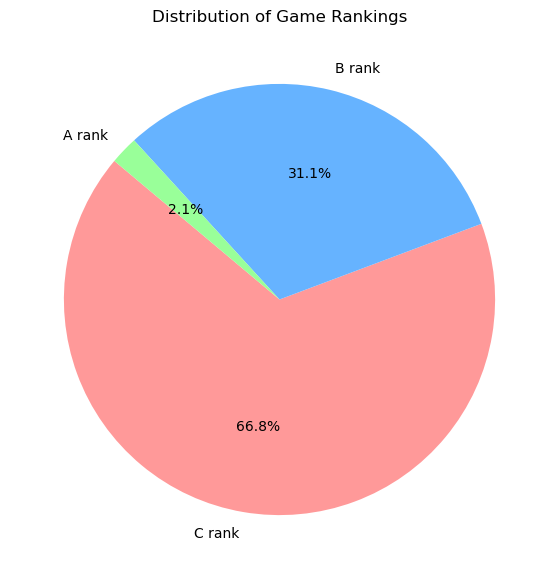

In [207]:

rank_counts = df_r["Game_rank"].value_counts()

colors = ["#ff9999", "#66b3ff", "#99ff99"]  # Red, Blue, Green

plt.figure(figsize=(7, 7))
plt.pie(rank_counts, labels=rank_counts.index, autopct="%1.1f%%", colors=colors, startangle=140)

plt.title("Distribution of Game Rankings")
plt.show()


- [x] **Which team had the most A rank performances?**

In [199]:
# Filter only "A rank" games
a_rank_games = df_r.loc[df_r["Game_rank"] == "A rank"]

# Count A rank performances for home and away teams
home_a_rank_wins = a_rank_games[a_rank_games["result"] == "H"].groupby("home_team").size()
away_a_rank_wins = a_rank_games[a_rank_games["result"] == "A"].groupby("away_team").size()

# Combine both home and away performances
total_a_rank_performances = home_a_rank_wins.add(away_a_rank_wins, fill_value=0).sort_values(ascending=False).head(1)

total_a_rank_performances


Manchester City    19.0
dtype: float64

- [x] **Based on the result dataframe, which team scored the most goals home and away, spanning all seasons**

In [205]:
home_goals = df_r.groupby("home_team")["home_goals"].sum().sort_values(ascending=False).head(1)  # Manchester City scored the most home goals

away_goals = df_r.groupby("away_team")["away_goals"].sum().sort_values(ascending=False).head(1) # Arsenal scored the most away goals

home_goals_mc = df_r.loc[df_r["home_team"] == "Manchester City"]["home_goals"].sum()


away_goals_mc = df_r.loc[df_r["away_team"] == "Manchester City"]["away_goals"].sum()


total_goals_mc = home_goals_mc + away_goals_mc

total_goals_mc

home_goals_a = df_r.loc[df_r["home_team"] == "Arsenal"]["home_goals"].sum()

away_goals_a = df_r.loc[df_r["away_team"] == "Arsenal"]["away_goals"].sum()

total_goals_a = home_goals_a + away_goals_a

total_goals_a

# Manchester city is only 5 goals ahead of Arsenal throughout the seasons

861.0

- [x] **Which team scored the most goals overall, throughout all the seasons?**

In [136]:
home_goals = df_r.groupby("home_team")["home_goals"].sum()
away_goals = df_r.groupby("away_team")["away_goals"].sum()


total_goals = home_goals.add(away_goals, fill_value=0)  # Combine both home and away goals

total_goals.sort_values(ascending= False).head(1)

# As we can see, neither Manchester City nor Arsenal were the teams that scored the most, but rather Manchester United

home_team
Manchester United    867.0
dtype: float64

- [x] **Which team scored the most goals per season?**

In [212]:
# Sum home and away goals per team and season
home_goals_per_season = df_r.groupby(["season", "home_team"])["home_goals"].sum()
away_goals_per_season = df_r.groupby(["season", "away_team"])["away_goals"].sum()

# Combine home and away goals per team and season
total_goals_per_season = home_goals_per_season.add(away_goals_per_season, fill_value=0)

# Find the team with the most goals per season
most_goals_per_season = total_goals_per_season.groupby("season").idxmax()
most_goals_per_season_goals = total_goals_per_season.groupby("season").max()


result_mgps = pd.DataFrame({"Team": most_goals_per_season,"Goals": most_goals_per_season_goals})

result_mgps

,Team,Goals
season,,
2006-2007,"(2006-2007, Manchester United)",83.0
2007-2008,"(2007-2008, Manchester United)",80.0
2008-2009,"(2008-2009, Liverpool)",77.0
2009-2010,"(2009-2010, Chelsea)",103.0
2010-2011,"(2010-2011, Manchester United)",78.0
2011-2012,"(2011-2012, Manchester City)",93.0
2012-2013,"(2012-2013, Manchester United)",86.0
2013-2014,"(2013-2014, Manchester City)",102.0
2014-2015,"(2014-2015, Manchester City)",83.0


- [x] **Create a histogram for the previous result**

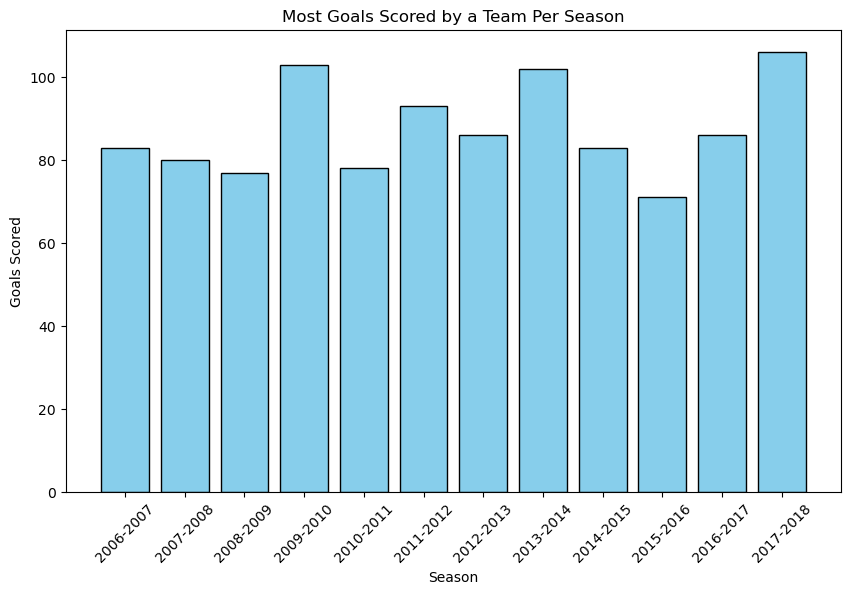

In [218]:

# Plot a histogram of goals scored by the top team each season
plt.figure(figsize=(10, 6))
plt.bar(result_mgps.index.astype(str), result_mgps["Goals"], color="skyblue", edgecolor="black")


plt.xlabel("Season")
plt.ylabel("Goals Scored")
plt.title("Most Goals Scored by a Team Per Season")
plt.xticks(rotation=45)  # Rotate season labels for better visibility

plt.show()


- [x] **Calculate the Elo rating for each team based on their match results, updating the rating after every match.**

In [255]:
import pandas as pd
import numpy as np


data = {'home_team': ['team_a', 'team_a', 'team_b', 'team_c', 'team_b'],
    'away_team': ['team_b', 'team_c', 'team_c', 'team_b', 'team_a'],
    'home_goals': [2, 1, 3, 1, 2],
    'away_goals': [1, 1, 2, 2, 1],
    'result': ['win', 'draw', 'home_win', 'draw', 'away_win']}

df = pd.DataFrame(data)


initial_rating = 1500
teams = pd.concat([df['home_team'], df['away_team']]).unique()
elo_ratings = {team: initial_rating for team in teams}

K = 30  # K-factor (adjust based on the desired sensitivity of Elo changes)


def update_elo(home_team, away_team, home_goals, away_goals, elo_ratings, K=30):
    home_rating = elo_ratings[home_team]
    away_rating = elo_ratings[away_team]
    E_home = 1 / (1 + 10 ** ((away_rating - home_rating) / 400))
    E_away = 1 / (1 + 10 ** ((home_rating - away_rating) / 400))
    if home_goals > away_goals:
        S_home = 1  # Home team wins
        S_away = 0  # Away team loses
    elif home_goals < away_goals:
        S_home = 0  # Home team loses
        S_away = 1  # Away team wins
    else:
        S_home = 0.5  
        S_away = 0.5  
    elo_ratings[home_team] += K * (S_home - E_home)
    elo_ratings[away_team] += K * (S_away - E_away)
    return elo_ratings


for index, row in df.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    home_goals = row['home_goals']
    away_goals = row['away_goals']
    
    
    elo_ratings = update_elo(home_team, away_team, home_goals, away_goals, elo_ratings)


elo_ratings_df = pd.DataFrame(list(elo_ratings.items()), columns=['team', 'elo_rating'])
elo_ratings_df = elo_ratings_df.sort_values(by='elo_rating', ascending=False)
print(elo_ratings_df)


     team   elo_rating
1  team_b  1529.969759
0  team_a  1499.380638
2  team_c  1470.649603


## 4. Data Merging

- [x] **Merge the two dataframes results and stats**

In [42]:
# Check both dataframes first to see what join shall we do

import pandas as pd

# Merge home team stats
df_merged = df_r.merge(df_s, left_on=['home_team', 'season'], right_on=['team', 'season'], how='left', suffixes=('_home', '_drop'))

# Merge away team stats
df_merged = df_merged.merge(df_s, left_on=['away_team', 'season'], right_on=['team', 'season'], how='left', suffixes=('_home', '_away'))

# Drop redundant columns
df_merged.drop(columns=['team_home', 'team_away'], inplace=True)

# Display merged dataset
df_merged.head(10)


# The only thing they have in common is the season, so let's merge them like that

# df_t = df_r.merge(df_s, on="season", how="outter")

# merge these two as an outter merge. you'll need it for PCA

,home_team,away_team,home_goals,away_goals,result,season,wins_home,losses_home,goals_home,total_yel_card_home,...,backward_pass_away,total_cross_away,corner_taken_away,touches_away,big_chance_missed_away,clearance_off_line_away,dispossessed_away,penalty_save_away,total_high_claim_away,punches_away
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007,10.0,20.0,32.0,68.0,...,NaN,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007,19.0,8.0,63.0,59.0,...,NaN,886.0,213.0,20002.0,NaN,5.0,NaN,0.0,57.0,26.0
2,Everton,Watford,2.0,1.0,H,2006-2007,15.0,10.0,52.0,65.0,...,NaN,983.0,212.0,16772.0,NaN,3.0,NaN,0.0,63.0,15.0
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007,11.0,17.0,38.0,65.0,...,NaN,813.0,177.0,17564.0,NaN,4.0,NaN,2.0,61.0,29.0
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007,14.0,12.0,45.0,48.0,...,NaN,911.0,205.0,20812.0,NaN,8.0,NaN,5.0,56.0,25.0
5,Reading,Middlesbrough,3.0,2.0,H,2006-2007,16.0,15.0,52.0,38.0,...,NaN,769.0,187.0,19199.0,NaN,5.0,NaN,0.0,78.0,37.0
6,West Ham United,Charlton Athletic,3.0,1.0,H,2006-2007,12.0,21.0,35.0,85.0,...,NaN,750.0,178.0,19497.0,NaN,7.0,NaN,2.0,50.0,13.0
7,Bolton Wanderers,Tottenham Hotspur,2.0,0.0,H,2006-2007,16.0,14.0,47.0,84.0,...,NaN,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0
8,Manchester United,Fulham,5.0,1.0,H,2006-2007,28.0,5.0,83.0,60.0,...,NaN,895.0,173.0,18720.0,NaN,6.0,NaN,1.0,45.0,22.0
9,Chelsea,Manchester City,3.0,0.0,H,2006-2007,24.0,3.0,64.0,62.0,...,NaN,811.0,198.0,19378.0,NaN,4.0,NaN,1.0,64.0,17.0


# Data Science (Using the Pandas Library)

## 5. Inferential Statistics

Means per team, variance, standard deviation, median, etc. and respective visualizations

- [] **Mean of the goals of a team per season**

- [] **Compute the correlation matrix for various columns**

## 6. PCA(Principal Component Analysis)

- [x] **Conduct a PCA to identify dominant performance patterns**

$H_0$: There is no meaningful lower-dimensional structure in the dataset. All features are equally independent, and reducing dimensions will lead to significant information loss.

$H_a$: A lower-dimensional structure exists that captures most of the variance, meaning that team performance can be described using fewer principal components.

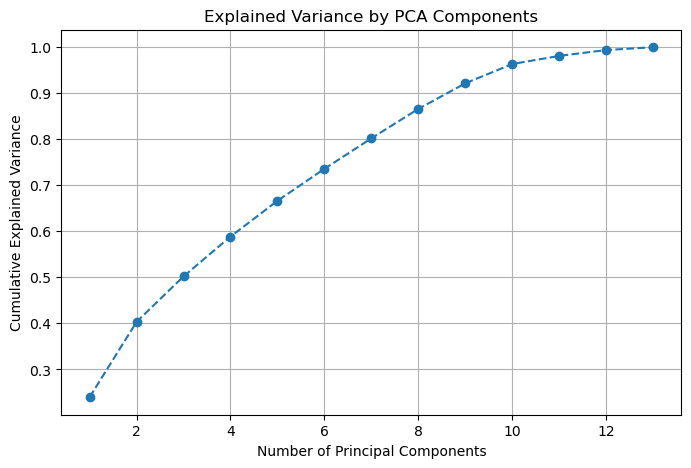

C:\Users\micro\AppData\Local\Temp\ipykernel_29512\3918873664.py:43: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', data=df_pca, palette='viridis')


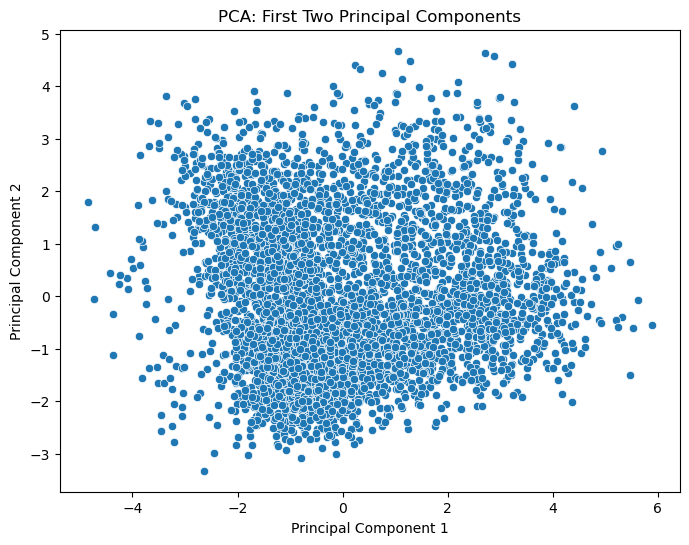

Principal Component 1: 0.2396 variance explained
Principal Component 2: 0.1635 variance explained
Principal Component 3: 0.0990 variance explained
Principal Component 4: 0.0865 variance explained
Principal Component 5: 0.0778 variance explained


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("stats.csv")

features = ['home_goals', 'away_goals', 'wins_home', 'losses_home', 'goals_home',
    'total_yel_card_home', 'total_cross_away', 'corner_taken_away', 'touches_away',
    'clearance_off_line_away', 'penalty_save_away', 'total_high_claim_away', 'punches_away']


X = df_merged[features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=len(features))  # Keep all components initially
X_pca = pca.fit_transform(X_scaled)

# Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot Explained Variance

plt.figure(figsize=(8,5))
plt.plot(range(1, len(features)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

df_pca = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, palette='viridis')
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

for i, var in enumerate(explained_variance[:5], 1):
    print(f"Principal Component {i}: {var:.4f} variance explained")


### Model's conclusions

PC1 (23.96%) and PC2 (16.35%) together explain 40.3% of the total variance.

This means a significant portion of the data's variation can be captured using just two dimensions.

PC3, PC4, and PC5 contribute smaller amounts of variance (~10%, 8.7%, 7.8%).

The logarithmic shape of the explained variance graph suggests that most variance is captured in the first few components, while later components add only marginal value.

This means reducing dimensionality to a few principal components (e.g., top 3-5) may still retain most of the information.

Since PC1 and PC2 explain a significant amount of variance (~40.3%) and the variance graph suggests strong initial information retention, we reject $H_0$ and accept $H_a$.
  
This means PCA is useful in reducing dimensionality while preserving essential information.

## 7. Logistic Regression

- [x] **Predict the outcome (win/loss/draw) of future soccer matches based on historical data using the Logistic Regression model**

$H_0$: The logistic regression model does not predict match outcomes significantly better than random guessing.

$H_a$: The logistic regression model predicts match outcomes significantly better than random guessing.

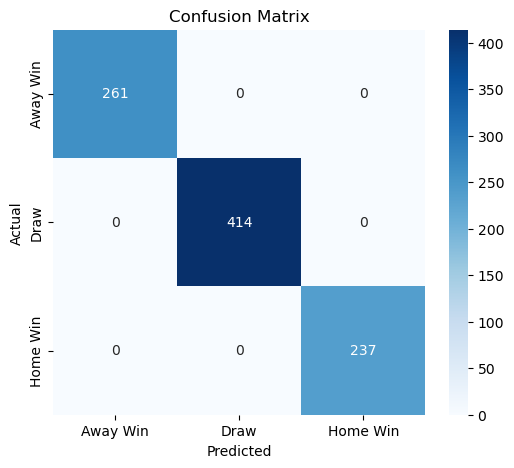

Logistic Regression Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       414
           2       1.00      1.00      1.00       237

    accuracy                           1.00       912
   macro avg       1.00      1.00      1.00       912
weighted avg       1.00      1.00      1.00       912



In [65]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df_r = pd.read_csv("results.csv")


df_r.dropna(subset=["result"])

df_r['result'] = df_r['result'].map({'H': 1, 'D': 2, 'A': 0})
df_r = pd.get_dummies(df_r, columns=['home_team', 'away_team']) # categorizes with 0/1 to see if the team is present

df_r['goal_difference'] = df_r['home_goals'] - df_r['away_goals']
df_r['home_advantage'] = 1  # Indicator of whether the match is a home game (simple version)

features = ['home_advantage', 'goal_difference'] + [col for col in df_r.columns if 'home_team' in col or 'away_team' in col]

X = df_r[features]
y = df_r['result']  # Contains NaN

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Away Win', 'Draw', 'Home Win'], yticklabels=['Away Win', 'Draw', 'Home Win'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


### Model's conclusions

- The model achieved 100% accuracy, meaning it predicted every match outcome correctly, but this can be misleading. The model may have memorized the training data rather than learning generalizable patterns.

- The confusion matrix is perfectly diagonal, which means that every match result was predicted correctly. The model has no false positives or false negatives. It perfectly distinguishes among home wins, away wins, and draws.  (The grammar here is nuanced: 'among' is used for more than two subjects, while 'between' is typically reserved for comparisons involving two. Although we are making pairwise comparisons (comparing one subject with another), each category is effectively distinguished against the other two, hence I use 'among.')

- The 100% accuracy here should be further scrutinized, and we should check if this result holds up in cross-validation or when removing strong features like goal_difference.

- Since the model achieved 100% accuracy, we would reject $H_0$ and accept $H_a$. However, given the suspiciously high accuracy, we should verify if the model is truly generalizing well.

# 8. Linear Regression

- [x] Predicting a continuous target variable, such as goals.
Target Variable: goals
Features: wins, losses, and punches

- $H_0$: There is no statistically significant relationship between the selected team statistics (features) and the number of goals scored.
  
- $H_a$: There is a statistically significant relationship between the selected team statistics and the number of goals scored.

MAE: 4.617369465218373
MSE: 33.32784947562359
RMSE: 5.773027756353124
R² Score: 0.7611731649083359


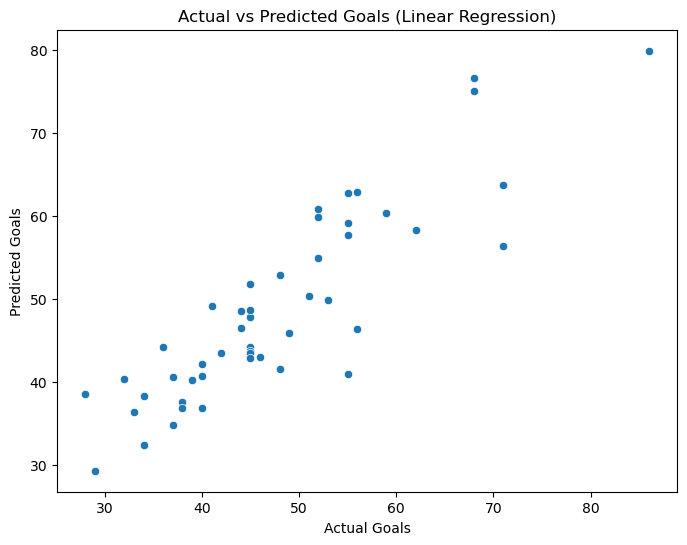

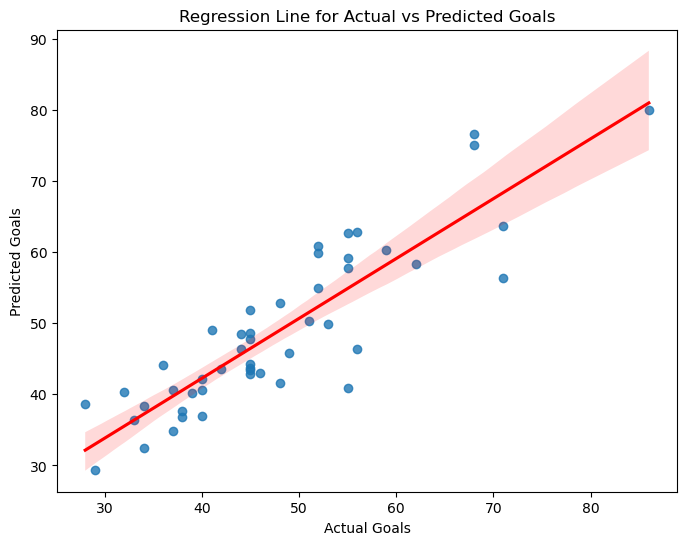

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# You can choose specific coluns instead of just removing ones that don't matter

df = pd.read_csv("stats.csv") 

X = df[['wins','losses','punches']]  # Dropping non-numeric columns
y = df['goals']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Goals")
plt.ylabel("Predicted Goals")
plt.title("Actual vs Predicted Goals (Linear Regression)")
plt.show()


plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel("Actual Goals")
plt.ylabel("Predicted Goals")
plt.title("Regression Line for Actual vs Predicted Goals")
plt.show()

## Model's Conclusions

- MAE: 4.62 → On average, predictions are off by ~4.62 goals.

- MSE: 33.33 → Higher penalty for large errors.

- RMSE: 5.77 → Typical prediction error is ~5.77 goals.

- R² Score: 0.76 → Model explains 76% of goal variance, indicating a strong correlation.

Since the model achieved an $R^2$ score of 0.76, meaning 76% of goal variance is explained by the selected features, we have strong evidence that team statistics influence goals scored.

Thus, we reject the null hypothesis $H_0$ and support the alternative hypothesis $H_a$

# 9. Random Forest

Use Case: Predicting continuous values, such as goals, based on various team statistics.
Target Variable: goals (number of goals scored by a team)
Features: total_yel_card, total_red_card, total_scoring_att, att_freekick_goal

- $H_0$: There is no statistically significant relationship between the selected team statistics (total_yel_card, total_red_card, total_scoring_att, att_freekick_goal) and the number of goals scored.
  
- $H_a$: There is a statistically significant relationship between the selected team statistics and the number of goals scored.

MAE: 7.855389631973892
MSE: 94.4135271035703
RMSE: 9.716662343807688
R² Score: 0.3234341782394633


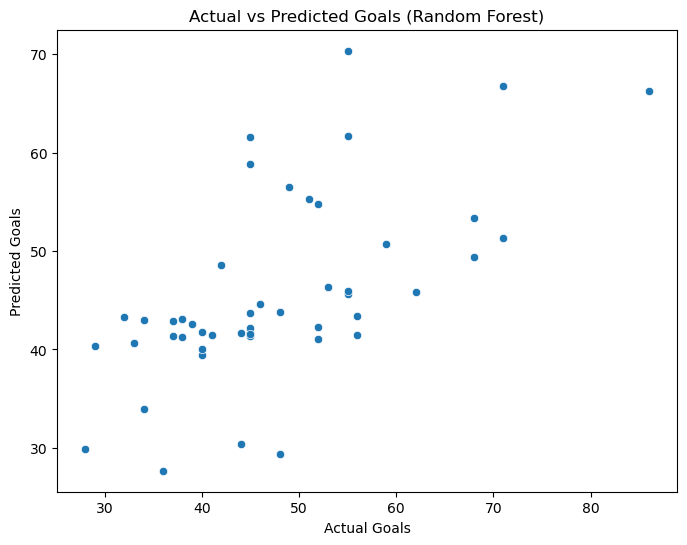

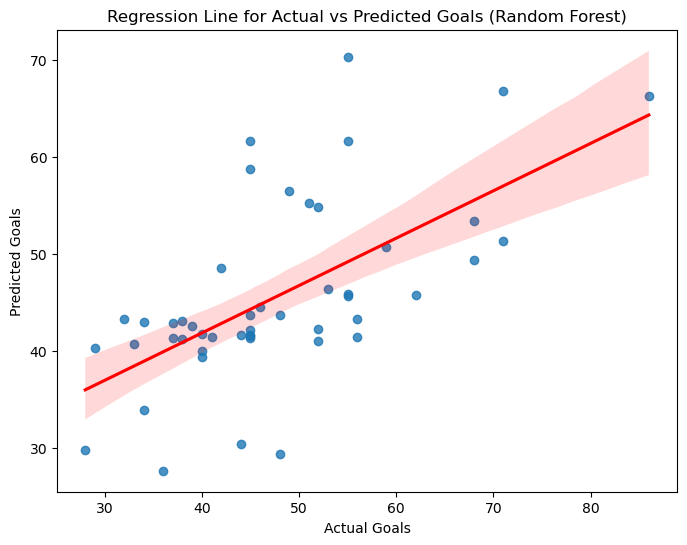

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = df[['total_yel_card', 'total_red_card', 'total_scoring_att', 'att_freekick_goal']]
y = df['goals']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Goals")
plt.ylabel("Predicted Goals")
plt.title("Actual vs Predicted Goals (Random Forest)")
plt.show()


plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel("Actual Goals")
plt.ylabel("Predicted Goals")
plt.title("Regression Line for Actual vs Predicted Goals (Random Forest)")
plt.show()

### Model's Conclusions  

- **MAE:** *7.86* Predictions are off by ~7.86 goals on average.  
- **MSE:** *94.41*  High error, indicating large deviations.  
- **RMSE:** *9.72*  Typical prediction error is ~9.72 goals.  
- **R² Score:** *0.32*  Model explains only 32.3% of goal variance, meaning weak predictive power. Not very reliable.  

**Fail to reject $H_0$** No strong evidence that these stats alone are good goal predictors.  


# 10. Gradient Boosting

Target Variable: goals
Features: total_yel_card, total_red_card, total_scoring_att, ontarget_scoring_att, att_freekick_goal, clean_sheet, saves, total_pass, total_cross, etc.
Question: "What factors influence the number of goals scored by a team?"

- $H_0$: There is no statistically significant relationship between the selected features (team statistics) and the number of goals scored.

- $H_a$: There is a statistically significant relationship between the selected features and the number of goals scored.

MAE: 5.770336270332336
MSE: 46.394794482540796
RMSE: 6.811372437515129
R² Score: 0.6675356464539453


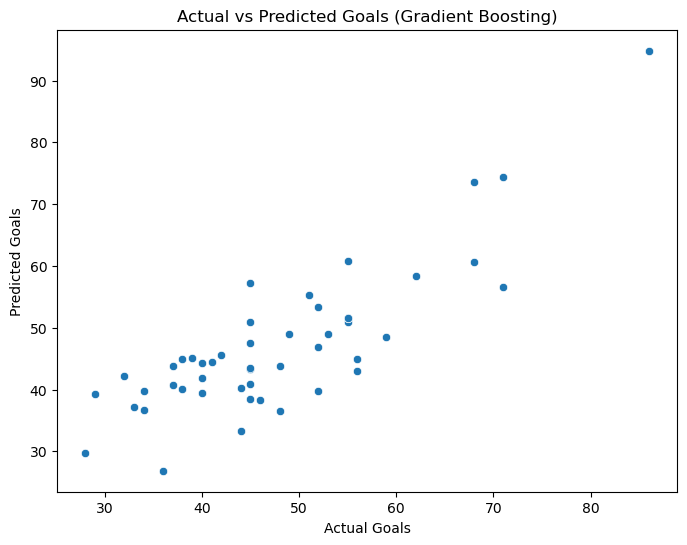

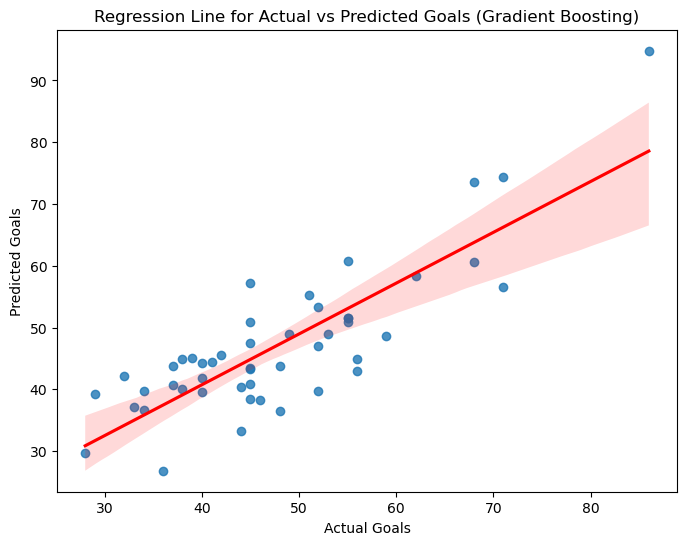

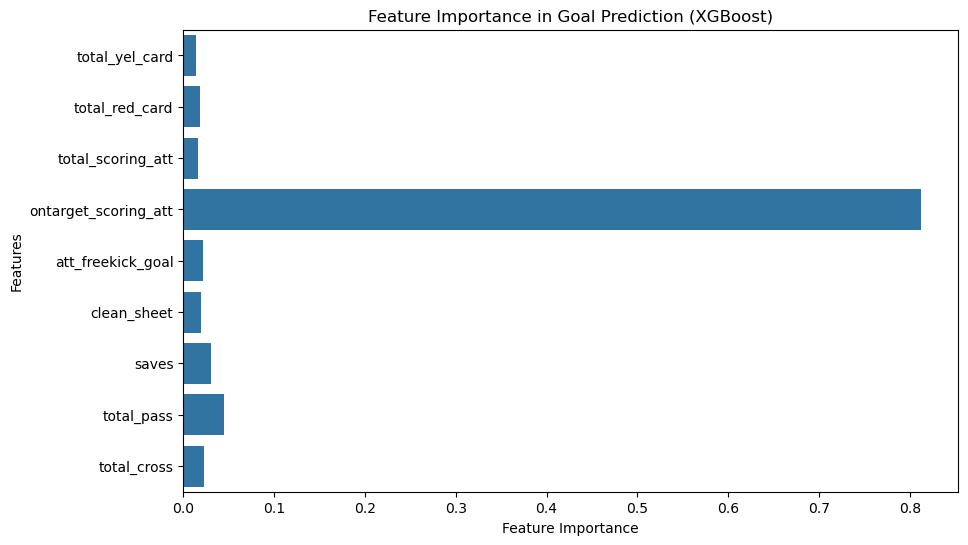

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = df[['total_yel_card', 'total_red_card', 'total_scoring_att', 'ontarget_scoring_att', 
        'att_freekick_goal', 'clean_sheet', 'saves', 'total_pass', 'total_cross']]
y = df['goals']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Goals")
plt.ylabel("Predicted Goals")
plt.title("Actual vs Predicted Goals (Gradient Boosting)")
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel("Actual Goals")
plt.ylabel("Predicted Goals")
plt.title("Regression Line for Actual vs Predicted Goals (Gradient Boosting)")
plt.show()

# Feature Importance Plot (what is this for?)
plt.figure(figsize=(10,6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Goal Prediction (XGBoost)")
plt.show()


### Model's conclusions


- **MAE:** *5.77* → Predictions are off by ~5.77 goals on average.  
- **MSE:** *46.39* → Lower than Random Forest, meaning fewer large errors.  
- **RMSE:** *6.81* → Typical prediction error is ~6.81 goals.  
- **R² Score:** *0.67* → Model explains 66.75% of goal variance, showing strong predictive power.  
   
- **Reject H₀** → The model confirms that these statistics impact goal-scoring.  

### **Feature Importance & Its Usefulness**  
- Shows which team stats contribute most to goal prediction.  
- Helps improve **model performance, feature selection, and decision-making**.  
- Coaches & analysts can use this to **optimize strategies for scoring more goals**. 

# 11. K-means Clustering

Use Case: Segmenting teams based on their performance statistics.
Features: All team statistics columns (e.g., total_yel_card, total_red_card, total_scoring_att, att_freekick_goal, etc.).

X = df[['total_yel_card', 'total_red_card', 'total_scoring_att', 'ontarget_scoring_att', 
        'att_freekick_goal', 'clean_sheet', 'saves', 'total_pass', 'total_cross']]
y = df['goals']

$H_0$: There is no meaningful grouping of teams based on the selected features. Teams are distributed randomly across clusters.

$H_a$: There are meaningful clusters or groups of teams based on the selected features. Teams within the same cluster share similar characteristics.

C:\Users\micro\ansel\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\micro\ansel\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\micro\ansel\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\micro\ansel\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

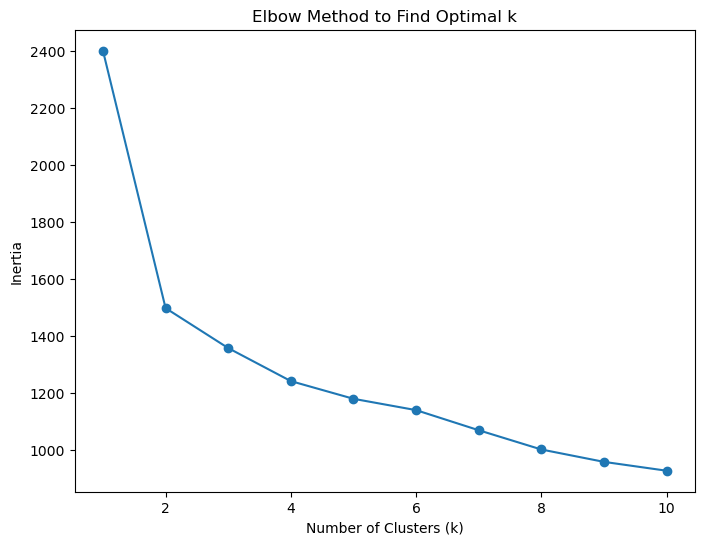

C:\Users\micro\ansel\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


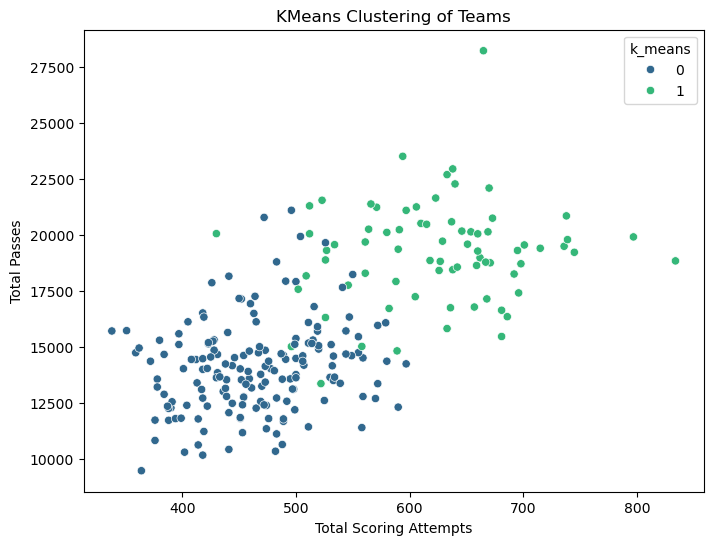

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Feature selection: Include wins and losses if needed
X = df[['total_yel_card', 'total_red_card', 'total_scoring_att', 'ontarget_scoring_att', 
        'att_freekick_goal', 'clean_sheet', 'total_pass', 'total_cross', 'wins', 'losses']]


scaler = StandardScaler()
X = scaler.fit_transform(X)


inertia = []
for k in range(1, 11):  # testing k from 1 to 10
    k_m = KMeans(n_clusters=k, random_state=42)
    k_m.fit(X)
    inertia.append(k_m.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.show()


k_m = KMeans(n_clusters=2, random_state=42)  # the elbow seems to be at k=2
k_m.fit(X)


df['k_means'] = k_m.labels_

# Plot the clustering result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['total_scoring_att'], y=df['total_pass'], data=df, hue='k_means', palette='viridis')
plt.title('KMeans Clustering of Teams')
plt.xlabel('Total Scoring Attempts')
plt.ylabel('Total Passes')
plt.show()


### Model's conclusions

The teams are clearly separated into distinct groups (colored differently based on the cluster label), it would indicate that the clusters represent meaningful groupings of teams.

The points are well-separated and distinct, it suggests that the clustering algorithm has identified meaningful differences between the teams based on the features chosen (for the most part, the clusters are well separated).

Reject the null hypothesis $H_0$, and accept the alternative hypothesis $H_a$.

# 12. K-Nearest Neighbors

Classifying the match result based on the nearest neighbors of a given match.
Target Variable: result (match result: home win, away win, or draw)
Features: home_goals, away_goals, season, home_team, away_team

$H_0$: The match result cannot be accurately predicted using the selected features (home_goals, away_goals, season, home_team, away_team).

$H_a$: The match result can be accurately predicted using these features.

C:\Users\micro\AppData\Local\Temp\ipykernel_29512\2733393860.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['season'] = le_season.fit_transform(X['season'])
C:\Users\micro\AppData\Local\Temp\ipykernel_29512\2733393860.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['home_team'] = le_team.fit_transform(X['home_team'])
C:\Users\micro\AppData\Local\Temp\ipykernel_29512\2733393860.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

Accuracy: 0.9923
              precision    recall  f1-score   support

           A       0.99      1.00      0.99       261
           D       0.99      0.98      0.99       237
           H       1.00      1.00      1.00       414

    accuracy                           0.99       912
   macro avg       0.99      0.99      0.99       912
weighted avg       0.99      0.99      0.99       912



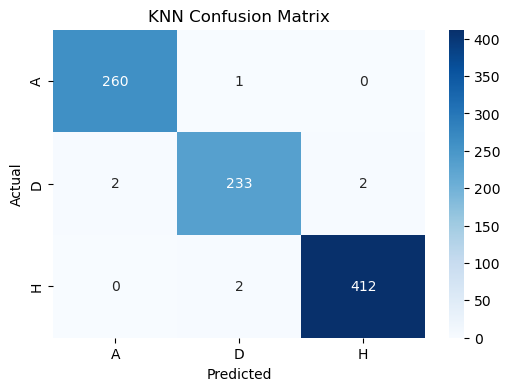

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("results.csv")  # results table

X = df[['home_goals', 'away_goals', 'season', 'home_team', 'away_team']]
y = df['result']  # Target variable: match result (Home Win, Away Win, Draw)


le_season = LabelEncoder()
le_team = LabelEncoder()

X['season'] = le_season.fit_transform(X['season'])
X['home_team'] = le_team.fit_transform(X['home_team'])
X['away_team'] = le_team.transform(X['away_team'])  # Use the same encoder


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))


plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

### Model's conclusions

Since the model achieves 99% accuracy, we reject $H_0$ in favor of $H_1$.

The features strongly influence the match result classification, meaning past match data is highly predictive.

The model performs exceptionally well, suggesting that the chosen features are highly informative for predicting match results.

## 13. Feature Importance

We build upon the previous case, to check which columns are most relevant to the 'result' column

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X = df[['home_goals', 'away_goals', 'season', 'home_team', 'away_team']]
y = df['result']

# Encode categorical features
le_season = LabelEncoder()
le_team = LabelEncoder()

X['season'] = le_season.fit_transform(X['season'])
X['home_team'] = le_team.fit_transform(X['home_team'])
X['away_team'] = le_team.transform(X['away_team'])  # Use the same encoder


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
baseline_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Baseline Accuracy: {baseline_acc:.4f}")

# Feature Importance Analysis - Drop one feature at a time
feature_importance = {}

for feature in X.columns:
    X_temp = X.drop(columns=[feature])  # Drop one feature

    # Split & Scale
    X_train_temp, X_test_temp, y_train, y_test = train_test_split(X_temp, y, test_size=0.2, random_state=42)
    X_train_temp = scaler.fit_transform(X_train_temp)
    X_test_temp = scaler.transform(X_test_temp)

    # Train KNN
    knn.fit(X_train_temp, y_train)
    y_pred = knn.predict(X_test_temp)
    temp_acc = accuracy_score(y_test, y_pred)
    
    # Store accuracy drop
    feature_importance[feature] = baseline_acc - temp_acc
    print(f"Dropping {feature}: Accuracy = {temp_acc:.4f}, Drop = {baseline_acc - temp_acc:.4f}")

# Sort features by importance
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Display ranked feature importance
print("\nFeature Importance (Higher drop means more important):")
for feature, drop in sorted_features:
    print(f"{feature}: {drop:.4f}")

C:\Users\micro\AppData\Local\Temp\ipykernel_29512\547234381.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['season'] = le_season.fit_transform(X['season'])
C:\Users\micro\AppData\Local\Temp\ipykernel_29512\547234381.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['home_team'] = le_team.fit_transform(X['home_team'])
C:\Users\micro\AppData\Local\Temp\ipykernel_29512\547234381.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Baseline Accuracy: 0.9923
Dropping home_goals: Accuracy = 0.5691, Drop = 0.4232
Dropping away_goals: Accuracy = 0.5943, Drop = 0.3980
Dropping season: Accuracy = 0.9956, Drop = -0.0033
Dropping home_team: Accuracy = 0.9967, Drop = -0.0044
Dropping away_team: Accuracy = 0.9934, Drop = -0.0011

Feature Importance (Higher drop means more important):
home_goals: 0.4232
away_goals: 0.3980
away_team: -0.0011
season: -0.0033
home_team: -0.0044


### Conclusions

As expected, goals scored are by far the strongest predictors of match results.

Team names & season have minimal impact—the model focuses on goal-based performance rather than which teams are playing.

If simplifying the model, we could remove "season," "home_team," and "away_team" without losing predictive power.

# Data Analysis (Using the PySpark Library)

Load Data and Preprocessing

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler

# Initialize Spark session
spark = SparkSession.builder.appName("FootballAnalysis").getOrCreate()

# Load dataset
df_r = spark.read.csv("results.csv", header=True, inferSchema=True)
df_s = spark.read.csv("statistics.csv", header=True, inferSchema=True)

# Handling missing values
df_r = df_r.dropna()  # Remove rows with missing values

# Convert categorical column 'result' to numerical values (similar to Label Encoding)
df_r = df_r.withColumn("result", when(col("result") == "H", 1)
                                    .when(col("result") == "D", 2)
                                    .otherwise(0))

# Convert categorical team names into indexed values
indexer = StringIndexer(inputCols=["home_team", "away_team"], 
                        outputCols=["home_team_idx", "away_team_idx"])
df_r = indexer.fit(df_r).transform(df_r)

# Feature engineering: goal difference
df_r = df_r.withColumn("goal_difference", col("home_goals") - col("away_goals"))

# Assemble features into a single vector
feature_cols = ["goal_difference", "home_team_idx", "away_team_idx"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_r = assembler.transform(df_r)


# Data Science (Using the PySpark Library)

Using $\chi^2$ determine which features contribute the most to predicting match results.

In [ ]:
from pyspark.ml.feature import ChiSqSelector
from pyspark.ml.stat import ChiSquareTest

# Assemble features into a vector
feature_cols = ["home_goals", "away_goals", "wins_home", "losses_home", "total_scoring_att"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_r = assembler.transform(df_r)

# Chi-Square Feature Selection
selector = ChiSqSelector(numTopFeatures=3, featuresCol="features", labelCol="result", outputCol="selected_features")
df_selected = selector.fit(df_r).transform(df_r)

# Show selected features
df_selected.select("selected_features", "result").show(5)


PCA for Dimensionality Reduction

In [ ]:
from pyspark.ml.feature import PCA

# Reduce dimensions
pca = PCA(k=3, inputCol="scaled_features", outputCol="pca_features")
pca_model = pca.fit(df_s)

# Show explained variance
print("Explained Variance: ", pca_model.explainedVariance)

# Transform dataset
df_s = pca_model.transform(df_s)
df_s.select("team", "pca_features").show(10)


Logistic Regression for Match Prediction

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Train-test split
train_data, test_data = df_r.randomSplit([0.8, 0.2], seed=42)

# Train logistic regression model
lr = LogisticRegression(featuresCol="features", labelCol="result", maxIter=100)
lr_model = lr.fit(train_data)

# Make predictions
predictions = lr_model.transform(test_data)

# Evaluate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="result", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Logistic Regression Accuracy: {accuracy}")

# Show classification report
predictions.select("result", "prediction").show(10)


Cross Validation using Logistic regression

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LogisticRegression

# Train-Test Split
train_data, test_data = df_selected.randomSplit([0.8, 0.2], seed=42)

# Define Model
lr = LogisticRegression(featuresCol="selected_features", labelCol="result", maxIter=100)

# Grid Search for Best Parameters
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 0.01, 0.001]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Cross-Validation
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=MulticlassClassificationEvaluator(labelCol="result"), numFolds=5)
cv_model = cv.fit(train_data)

# Get Best Model
best_model = cv_model.bestModel
print("Best Parameters:", best_model._java_obj.getRegParam(), best_model._java_obj.getElasticNetParam())

# Make Predictions
predictions = best_model.transform(test_data)

# Evaluate Model
evaluator = MulticlassClassificationEvaluator(labelCol="result", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Optimized Logistic Regression Accuracy: {accuracy}")


KMeans Clustering for Team Segmentation

In [ ]:
from pyspark.ml.clustering import KMeans

# Feature selection
feature_cols = ["total_yel_card", "total_red_card", "total_scoring_att", "ontarget_scoring_att",
                "att_freekick_goal", "clean_sheet", "total_pass", "total_cross", "wins", "losses"]

assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_s = assembler.transform(df_s)

# Scale features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
df_s = scaler.fit(df_s).transform(df_s)

# Train KMeans model
kmeans = KMeans(featuresCol="scaled_features", k=3, seed=42)
model = kmeans.fit(df_s)

# Assign clusters
df_s = model.transform(df_s)
df_s.select("team", "prediction").show(10)


Random Forest for Goal Prediction

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Select features
feature_cols = ["total_scoring_att", "ontarget_scoring_att", "att_freekick_goal", "total_cross"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_s = assembler.transform(df_s)

# Train-test split
train_data, test_data = df_s.randomSplit([0.8, 0.2], seed=42)

# Train model
rf = RandomForestRegressor(featuresCol="features", labelCol="goals")
rf_model = rf.fit(train_data)

# Make predictions
predictions = rf_model.transform(test_data)

# Evaluate
evaluator = RegressionEvaluator(labelCol="goals", metricName="r2")
r2 = evaluator.evaluate(predictions)
print(f"Random Forest R² Score: {r2}")

# Show predictions
predictions.select("goals", "prediction").show(10)


Correlation Analysis

In [ ]:
from pyspark.sql.functions import corr

# Find correlation between goals and other features
df_s.select(corr("goals", "total_scoring_att")).show()
df_s.select(corr("goals", "ontarget_scoring_att")).show()
df_s.select(corr("goals", "total_cross")).show()


Aggregation & Statistical Analysis

In [ ]:
from pyspark.sql.functions import avg, max, min, stddev

# Compute summary statistics for goals
df_s.agg(avg("goals"), max("goals"), min("goals"), stddev("goals")).show()

# Find teams with highest goals
df_s.select("team", "goals").orderBy(col("goals").desc()).show(5)


Deep Learning with PyTorch
We build a Deep Learning Model to predict match results.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Convert PySpark DataFrame to NumPy
train_data_np = np.array(train_data.select("selected_features", "result").collect())
X_train, y_train = train_data_np[:, 0], train_data_np[:, 1]

# Define Neural Network
class MatchPredictor(nn.Module):
    def __init__(self):
        super(MatchPredictor, self).__init__()
        self.fc1 = nn.Linear(3, 10)
        self.fc2 = nn.Linear(10, 3)  # 3 classes (H, D, A)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

# Train the Model
model = MatchPredictor()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

print("Deep Learning Model Training Completed!")


Build a Full Big Data Pipeline
We automate feature selection, model training, and evaluation.

In [ ]:
from pyspark.ml import Pipeline

# Define Pipeline Stages
pipeline = Pipeline(stages=[assembler, selector, lr])

# Train Pipeline
pipeline_model = pipeline.fit(train_data)

# Make Predictions
predictions = pipeline_model.transform(test_data)

# Evaluate
accuracy = evaluator.evaluate(predictions)
print(f"Final Model Accuracy: {accuracy}")


# Flask API

In [ ]:
from flask import Flask, request, jsonify
from pyspark.sql import SparkSession
from pyspark.ml import PipelineModel
import torch
import numpy as np

# Initialize Flask and Spark
app = Flask(__name__)

# Set up Spark session
spark = SparkSession.builder.appName("RealTimeMatchPrediction").getOrCreate()

# Load the pre-trained PySpark Model
pipeline_model = PipelineModel.load("path_to_your_saved_model")

# Define Neural Network (for PyTorch-based model if used)
class MatchPredictor(torch.nn.Module):
    def __init__(self):
        super(MatchPredictor, self).__init__()
        self.fc1 = torch.nn.Linear(3, 10)
        self.fc2 = torch.nn.Linear(10, 3)
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

# Load Pre-trained Deep Learning Model
model = MatchPredictor()
model.load_state_dict(torch.load("path_to_saved_pytorch_model.pth"))
model.eval()

# Helper function to process features
def prepare_features(home_goals, away_goals, wins_home, losses_home):
    # Example feature preparation
    features = np.array([home_goals, away_goals, wins_home, losses_home]).reshape(1, -1)
    return features

# Flask route for real-time predictions
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()

    # Get input features from JSON data
    home_goals = data['home_goals']
    away_goals = data['away_goals']
    wins_home = data['wins_home']
    losses_home = data['losses_home']

    # Process features for PySpark Model
    features = prepare_features(home_goals, away_goals, wins_home, losses_home)
    
    # PySpark pipeline prediction
    spark_df = spark.createDataFrame([(float(home_goals), float(away_goals), float(wins_home), float(losses_home))], ['home_goals', 'away_goals', 'wins_home', 'losses_home'])
    prediction_spark = pipeline_model.transform(spark_df)
    spark_pred = prediction_spark.select("prediction").collect()[0][0]

    # Process features for PyTorch model
    X_tensor = torch.tensor(features, dtype=torch.float32)
    with torch.no_grad():
        dl_pred = model(X_tensor)
        dl_pred_class = torch.argmax(dl_pred, dim=1).item()

    # Combine both predictions and send response
    result = {
        "prediction_spark": spark_pred,
        "prediction_deep_learning": dl_pred_class,
        "description_spark": ["Home Win", "Draw", "Away Win"][spark_pred],
        "description_deep_learning": ["Home Win", "Draw", "Away Win"][dl_pred_class]
    }

    return jsonify(result)

if __name__ == '__main__':
    app.run(debug=True, host="0.0.0.0", port=5000)


Now we will set up Spark Streaming to continuously process incoming match data.

In [ ]:
from pyspark.streaming import StreamingContext
from pyspark.streaming.kafka import KafkaUtils

# Spark Streaming Context
ssc = StreamingContext(spark.sparkContext, 10)  # 10 seconds window for processing

# Kafka stream to simulate real-time data (or use other data sources like socket)
kafkaStream = KafkaUtils.createStream(ssc, 'localhost:2181', 'match-predictor', {'match-data': 1})

# Function to process the incoming data and make predictions
def process_data(rdd):
    if not rdd.isEmpty():
        data = rdd.collect()
        for record in data:
            match_info = record[1]  # This is the actual match data in your Kafka stream
            match_data = json.loads(match_info)
            
            # Pass match data to prediction API
            response = predict_match(match_data)
            print(response)

# Apply processing function to each RDD in the stream
kafkaStream.map(lambda x: x[1]).foreachRDD(process_data)

# Start the stream processing
ssc.start()
ssc.awaitTermination()


# Deploying Flask API with Spark Streaming to the Cloud:

This section will serve as a guide to help us in the process of deploying the Flask API with Spark Streaming, ensuring real-time predictions and scalable infrastructure using cloud services.

## 1. **Set Up Flask API**

   - **Install Flask**: Install Flask and necessary libraries for building the API.
     ```bash
     pip install flask
     ```

   - **Create Flask Application**: Define a simple Flask app with POST and GET routes to handle real-time data and return predictions.
   
     Example code:
     ```python
     from flask import Flask, request, jsonify
     import pyspark

     app = Flask(__name__)

     # Define your prediction model loading here
     # model = ... (your pre-trained model)

     @app.route('/predict', methods=['POST'])
     def predict():
         data = request.get_json()  # Get data from POST request
         # Extract relevant features from data
         features = data['features']
         prediction = model.predict(features)  # Predict using your model
         return jsonify({'prediction': prediction.tolist()})
     
     if __name__ == '__main__':
         app.run(debug=True)
     ```

## 2. **Integrate Spark Streaming**

   - **Install PySpark**: Make sure PySpark is installed for Spark Streaming functionality.
     ```bash
     pip install pyspark
     ```

   - **Set Up Spark Context**: Initialize a Spark session and configure Spark Streaming.
   
     Example code:
     ```python
     from pyspark.sql import SparkSession
     from pyspark.streaming import StreamingContext

     # Initialize Spark session and streaming context
     spark = SparkSession.builder.appName("RealTimePrediction").getOrCreate()
     ssc = StreamingContext(spark.sparkContext, 10)  # 10-second window for streaming
     
     # Stream data from a socket or other data source
     dataStream = ssc.socketTextStream("localhost", 9999)

     # Process stream data
     def process_stream_data(rdd):
         if not rdd.isEmpty():
             data = rdd.collect()  # Process your stream data here
             # Your real-time prediction logic goes here
             predictions = model.predict(data)
             # Output the results (you can store them or print/log)
             print(predictions)

     dataStream.foreachRDD(process_stream_data)
     ```

   - **Real-time Prediction Logic**: Define a function to handle real-time prediction inside `foreachRDD`.
   
     Example code:
     ```python
     def real_time_predict(data):
         # Your prediction logic goes here
         features = extract_features(data)
         prediction = model.predict(features)
         return prediction
     ```

## 3. **Containerize with Docker**

   - **Install Docker**: Install Docker on your machine if not already installed. Follow the [installation guide](https://docs.docker.com/get-docker/).
   
   - **Create Dockerfile**: Write a Dockerfile to containerize the Flask API and Spark Streaming application.
     Example Dockerfile:
     ```dockerfile
     FROM python:3.8-slim

     WORKDIR /app

     COPY . /app

     RUN pip install -r requirements.txt

     CMD ["python", "app.py"]
     ```

   - **Build and Run Docker Container**:
     ```bash
     docker build -t flask-spark-api .
     docker run -p 5000:5000 flask-spark-api
     ```

## 4. **Deploy to Cloud (AWS or Google Cloud)**

   - **Set Up Cloud Infrastructure**: Choose a cloud provider (AWS, Google Cloud) and create a VM (EC2 or similar) to deploy your application.

     Example for **AWS EC2**:
     - Launch an EC2 instance.
     - Open ports 5000 and 9999 for Flask API and Spark Streaming respectively.
     - SSH into the EC2 instance.
     - Install necessary packages (Python, Docker, etc.).
   
   - **Deploy Docker on Cloud VM**:
     - Push your Docker image to **Docker Hub** (or other registry) and pull it from your cloud VM.
     ```bash
     docker pull your-dockerhub-username/flask-spark-api
     docker run -p 5000:5000 -p 9999:9999 flask-spark-api
     ```

## 5. **Cloud Integration with Spark Streaming**

   - **Set Up Spark Cluster on Cloud**: If necessary, set up a Spark cluster on cloud (e.g., AWS EMR or Google Dataproc) to process data in parallel.
   
   - **Connect Spark Streaming to Cloud Data Sources**: Connect your Spark Streaming application to cloud data sources (e.g., S3, Google Cloud Storage) for real-time data ingestion.

## 6. **Test the Real-Time API**

   - **Send Real-Time Data**: Use a tool like **Postman** or **Curl** to send data to the Flask API and test the predictions in real-time.
     Example using curl:
     ```bash
     curl -X POST http://<your-cloud-ip>:5000/predict -d '{"features": [feature_values_here]}'
     ```

   - **Monitor API Responses**: Monitor API responses to ensure predictions are being made correctly.

## 7. **Monitor and Log Real-Time Predictions**

   - **Logging**: Set up logging for both the Flask API and Spark Streaming to capture any errors or issues that occur during predictions.
   
     Example:
     ```python
     import logging
     
     logging.basicConfig(level=logging.INFO)
     logging.info("Prediction Result: %s", prediction)
     ```

   - **Monitor Resource Usage**: Use tools like **CloudWatch** (AWS) or **Stackdriver** (Google Cloud) to monitor the health of your application and resources in the cloud.

## 8. **Optional: Add Auto-Scaling for High Availability**

   - **Set Up Auto-Scaling**: Configure auto-scaling policies on your cloud provider to ensure the system scales with demand (e.g., more predictions in high-traffic periods).

---

## Conclusion

By following these steps, you'll be able to deploy your **Flask API with Spark Streaming** in the cloud, allowing you to make real-time predictions for soccer match outcomes, process large datasets, and ensure scalability. This setup is highly scalable, resilient, and capable of handling real-time data, providing a complete and deployable machine learning solution in production.



# Advanced Model Interpretability, Monitoring, Logging, and Automated Retraini

# Complete Data Science Project Guide: Model Interpretability, Monitoring, Logging, and Automated Retraining

This guide will walk you through the steps of adding advanced model interpretability (using SHAP and LIME), setting up monitoring and logging for your deployed model, and implementing automated model retraining.

---

## 1. **Advanced Model Interpretability: SHAP Values & LIME**

### **Using SHAP for Model Interpretability**

SHAP (SHapley Additive exPlanations) values explain the output of machine learning models by assigning each feature an importance value that reflects how it contributes to a particular prediction.

1. **Install SHAP**:
   ```bash
   pip install shap
SHAP Explanation Example (For a Logistic Regression model):

python
Copiar
Editar
import shap
import numpy as np

# Load your trained model and data
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values for a single prediction
shap.initjs()  # This will initialize JavaScript visualization in Jupyter Notebooks
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])
Interpretation: SHAP provides a force_plot to visualize the impact of each feature on the prediction. Positive values indicate an increased probability of a certain class, while negative values indicate a decreased probability.

Using LIME for Local Interpretability
LIME (Local Interpretable Model-agnostic Explanations) explains individual predictions by perturbing the input data and observing the resulting changes in the predictions.

Install LIME:

bash
Copiar
Editar
pip install lime
LIME Explanation Example:

python
Copiar
Editar
from lime.lime_tabular import LimeTabularExplainer

# Create a LIME explainer
explainer = LimeTabularExplainer(X_train.values, mode="classification", training_labels=y_train, feature_names=X_train.columns)

# Choose an instance to explain
exp = explainer.explain_instance(X_test.iloc[0].values, model.predict_proba)

# Show the explanation
exp.show_in_notebook()
Interpretation: LIME shows which features are most important for a given prediction, providing an explanation of why the model made a particular decision for that instance.

2. Monitoring and Logging with Prometheus and Grafana
Step 1: Set Up Prometheus to Monitor Flask API
Install Prometheus Client:

pip install prometheus_client
Integrate Prometheus with Flask: Add Prometheus metrics to your Flask API to monitor requests and responses.

from prometheus_client import start_http_server, Summary
from flask import Flask, jsonify, request

# Create Flask app
app = Flask(__name__)

# Create a metric to track the request count
REQUEST_TIME = Summary('request_processing_seconds', 'Time spent processing request')

@REQUEST_TIME.time()
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    # Prediction code
    return jsonify({'prediction': prediction})

if __name__ == '__main__':
    start_http_server(8000)  # Start Prometheus metrics server on port 8000
    app.run(debug=True, host='0.0.0.0', port=5000)
Explanation: The prometheus_client library exposes Flask application metrics (like request processing time) via a /metrics endpoint. Prometheus will scrape this endpoint to collect and store metrics.

Configure Prometheus: Set up Prometheus to scrape the /metrics endpoint from your Flask application:

scrape_configs:
  - job_name: 'flask-api'
    static_configs:
      - targets: ['<your-server-ip>:8000']
Step 2: Set Up Grafana for Visualization
Install Grafana: Follow the official Grafana installation guide for your platform.

Configure Grafana to use Prometheus:

Add Prometheus as a data source in Grafana.

Create custom dashboards to visualize metrics (e.g., request count, response time, error rate).

Step 3: Set Up Alerts in Grafana:
Define alert conditions (e.g., high error rate, slow response time) in Grafana dashboards.

Set up email or Slack notifications to alert you when the system is underperforming or when anomalies are detected.

3. Automated Model Retraining
Automated Retraining ensures that your model stays updated and relevant over time, especially when new data comes in and the underlying patterns change (concept drift).

Step 1: Set Up a Retraining Pipeline
Create a Retraining Script: Write a script that periodically fetches new data, retrains the model, and saves the updated model to disk.

import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load new data
new_data = fetch_new_data()  # Define how to fetch new data

# Train the model
X_train, X_test, y_train, y_test = train_test_split(new_data.drop('target', axis=1), new_data['target'], test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'model_v2.pkl')
Step 2: Schedule the Retraining Task
Using Cron Jobs (for Unix/Linux systems) to schedule retraining tasks at regular intervals:

Open the crontab file:

crontab -e
Add a cron job to run the retraining script every week (for example):

0 0 * * 0 /usr/bin/python3 /path/to/retrain_model.py
Using Airflow: If you prefer more sophisticated workflows, use Apache Airflow to schedule and manage retraining tasks. Airflow allows you to create DAGs (Directed Acyclic Graphs) for scheduling tasks and monitoring their execution.

Example of a retraining DAG:

from airflow import DAG
from airflow.operators.python_operator import PythonOperator
from datetime import datetime

def retrain_model():
    # Call the retraining function here
    pass

default_args = {'owner': 'airflow', 'start_date': datetime(2022, 1, 1)}

dag = DAG('retrain_model', default_args=default_args, schedule_interval='@weekly')

retrain_task = PythonOperator(task_id='retrain', python_callable=retrain_model, dag=dag)
Step 3: Automate Model Deployment
Once retraining is complete, you can automate the deployment of the updated model back to your Flask API. This can be done using the same script you use for saving the model, or using CI/CD pipelines for more automation.


# Transfering the data to MySQL

- [x] **Save the original dataset with fixed columns**

In [234]:

df_r = pd.read_csv("results.csv")

df_r.columns = [col.replace(" ", "_") for col in df_r.columns]

df_r.to_csv("SQL_results.csv")

df_s = pd.read_csv("stats.csv")

df_s.columns = [col.replace(" ", "_") for col in df_s.columns]

df_s.to_csv("SQL_stats.csv")


# If this downloads as an xls file, go on Google and search for "xls to csv|Cloud convert" and convert that file to csv, it should work


- [x] **Save the clean dataset**

In [ ]:


df_s = pd.read_csv("clean_stats.csv")

df_s.columns = [col.replace(" ", "_") for col in df_s.columns]

df_s.to_csv("SQL_clean_stats.csv")

df_r = pd.read_csv("clean_results.csv")

df_r.columns = [col.replace(" ", "_") for col in df_r.columns]

df_r.to_csv("SQL_clean_results.csv")


# If this downloads as an xls file, go on Google and search for "xls to csv|Cloud convert" and convert that file to csv, it should work
